In [6]:
# %pip install Pillow

In [7]:
# %pip list

In [8]:
import pandas as pd
import os
import json
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import PIL
import PIL.Image

In [19]:
images_path = '../data/dataset/dataset/testing_data/images'
annotations_path = '../data/dataset/dataset/testing_data/annotations'

In [20]:
df = pd.DataFrame()
for fill_name in os.listdir(annotations_path):
    path = f"{annotations_path}/{fill_name}"
    name = fill_name.split('.')[0]
    f = open(path, encoding="utf-8")
    data = json.load(f)
    info_df = pd.json_normalize(data['form'])
    info_df['fil_name'] = name
    df = df.append(info_df)
df

,box,text,label,words,linking,id,fil_name
0,"[118, 249, 238, 309]",Fax,header,"[{'box': [118, 249, 238, 309], 'text': 'Fax'}]",[],0,82562350
1,"[272, 128, 458, 186]",LORILLARD TOBACCO COMPANY,header,"[{'box': [272, 128, 458, 186], 'text': 'LORILL...",[],1,82562350
2,"[184, 71, 202, 86]",,question,"[{'box': [184, 71, 202, 86], 'text': ''}]",[],2,82562350
3,"[595, 58, 661, 76]",001/004,other,"[{'box': [595, 58, 661, 76], 'text': '001/004'}]",[],3,82562350
4,"[116, 331, 144, 348]",To:,question,"[{'box': [116, 331, 144, 348], 'text': 'To:'}]","[[4, 22]]",4,82562350
...,...,...,...,...,...,...,...
23,"[175, 599, 556, 646]",IF YOU DO NOT RECEIVE ANY OF THE PAGES PROPERL...,header,"[{'text': 'IF', 'box': [175, 601, 190, 614]}, ...",[],23,82092117
24,"[162, 691, 626, 813]",THIS MESSAGE IS INTENDED ONLY FOR THE USE OF T...,answer,"[{'text': 'THIS', 'box': [163, 691, 190, 704]}...","[[5, 24]]",24,82092117
25,"[182, 887, 539, 928]",State Office Tower / 30 East Broad Street/ Col...,other,"[{'text': 'State', 'box': [182, 887, 209, 902]...",[],25,82092117
26,"[292, 941, 426, 954]",Primed an,other,"[{'text': '', 'box': [292, 941, 306, 954]}, {'...",[],26,82092117


In [21]:
labl_filtr = (df.label == 'other')&(df.text.str.contains('(^\d{5,10})|(\d{5,10}$)'))
df[labl_filtr]

/tmp/ipykernel_15738/1217538901.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  labl_filtr = (df.label == 'other')&(df.text.str.contains('(^\d{5,10})|(\d{5,10}$)'))


,box,text,label,words,linking,id,fil_name
18,"[653, 756, 683, 861]",82562350,other,"[{'box': [653, 756, 683, 861], 'text': '825623...",[],18,82562350
39,"[741, 581, 755, 628]",51484,other,"[{'box': [741, 581, 755, 628], 'text': '51484'}]",[],39,87528321
7,"[524, 866, 549, 968]",86079776,other,"[{'box': [524, 866, 549, 968], 'text': '860797...",[],7,86079776_9777
22,"[675, 774, 696, 879]",82200067,other,"[{'box': [675, 774, 696, 879], 'text': '822000...",[],22,82200067_0069
10,"[670, 782, 694, 891]",83443897,other,"[{'box': [670, 782, 694, 891], 'text': '834438...",[],10,83443897
1,"[680, 672, 700, 773]",87125460,other,"[{'box': [680, 672, 700, 773], 'text': '871254...",[],1,87125460
11,"[719, 764, 743, 904]",2051119008,other,"[{'box': [719, 764, 743, 904], 'text': '205111...",[],11,86263525
12,"[695, 787, 719, 895]",82252956,other,"[{'box': [695, 787, 719, 895], 'text': '822529...",[],12,82252956_2958
12,"[670, 802, 691, 891]",87137840,other,"[{'box': [670, 802, 691, 891], 'text': '871378...",[],12,87137840
10,"[661, 711, 682, 814]",8622042,other,"[{'box': [661, 711, 682, 814], 'text': '862204...",[],10,86220490


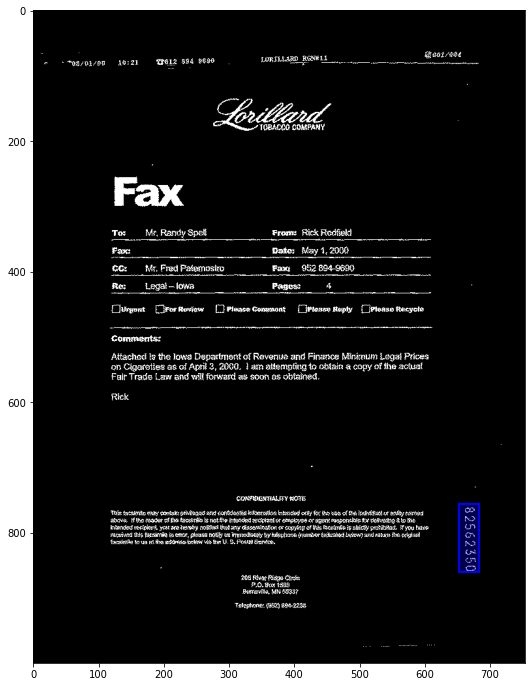

[False  True]


In [22]:
for name in df.fil_name.unique():
    im = np.array(PIL.Image.open(f'{images_path}/{name}.png').convert("1")
                 )
    fig,ax = plt.subplots(figsize=(12, 12))
    plt.imshow(im, cmap="binary")
    for lb in df[(df.fil_name == name)&labl_filtr]['box']:
        x = lb[0]
        y = lb[1]
        w = lb[2] - lb[0]
        h = lb[3] - lb[1]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, lw = 2,
                                 fc ='b', facecolor='none',alpha = 0.3)
        ax.add_patch(rect)
        rect = patches.Rectangle((x, y), w, h, lw=2,
                                 ec ='b', facecolor='none')
        ax.add_patch(rect)
    plt.show()
    print(np.unique(im))
    break  